In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors as mcolors

import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as curce_fit
import pandas as pd

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.rc('axes', labelsize=BIGGER_SIZE)   
plt.rc('axes', titlesize=MEDIUM_SIZE)   

def degtorad(deg):
    return(deg/180*np.pi)
def chisquared(func,xdata,ydata,parms):
    chisq=(func(xdata,*parms)-ydata)**2
    return sum(chisq)

0.0036508493179919278


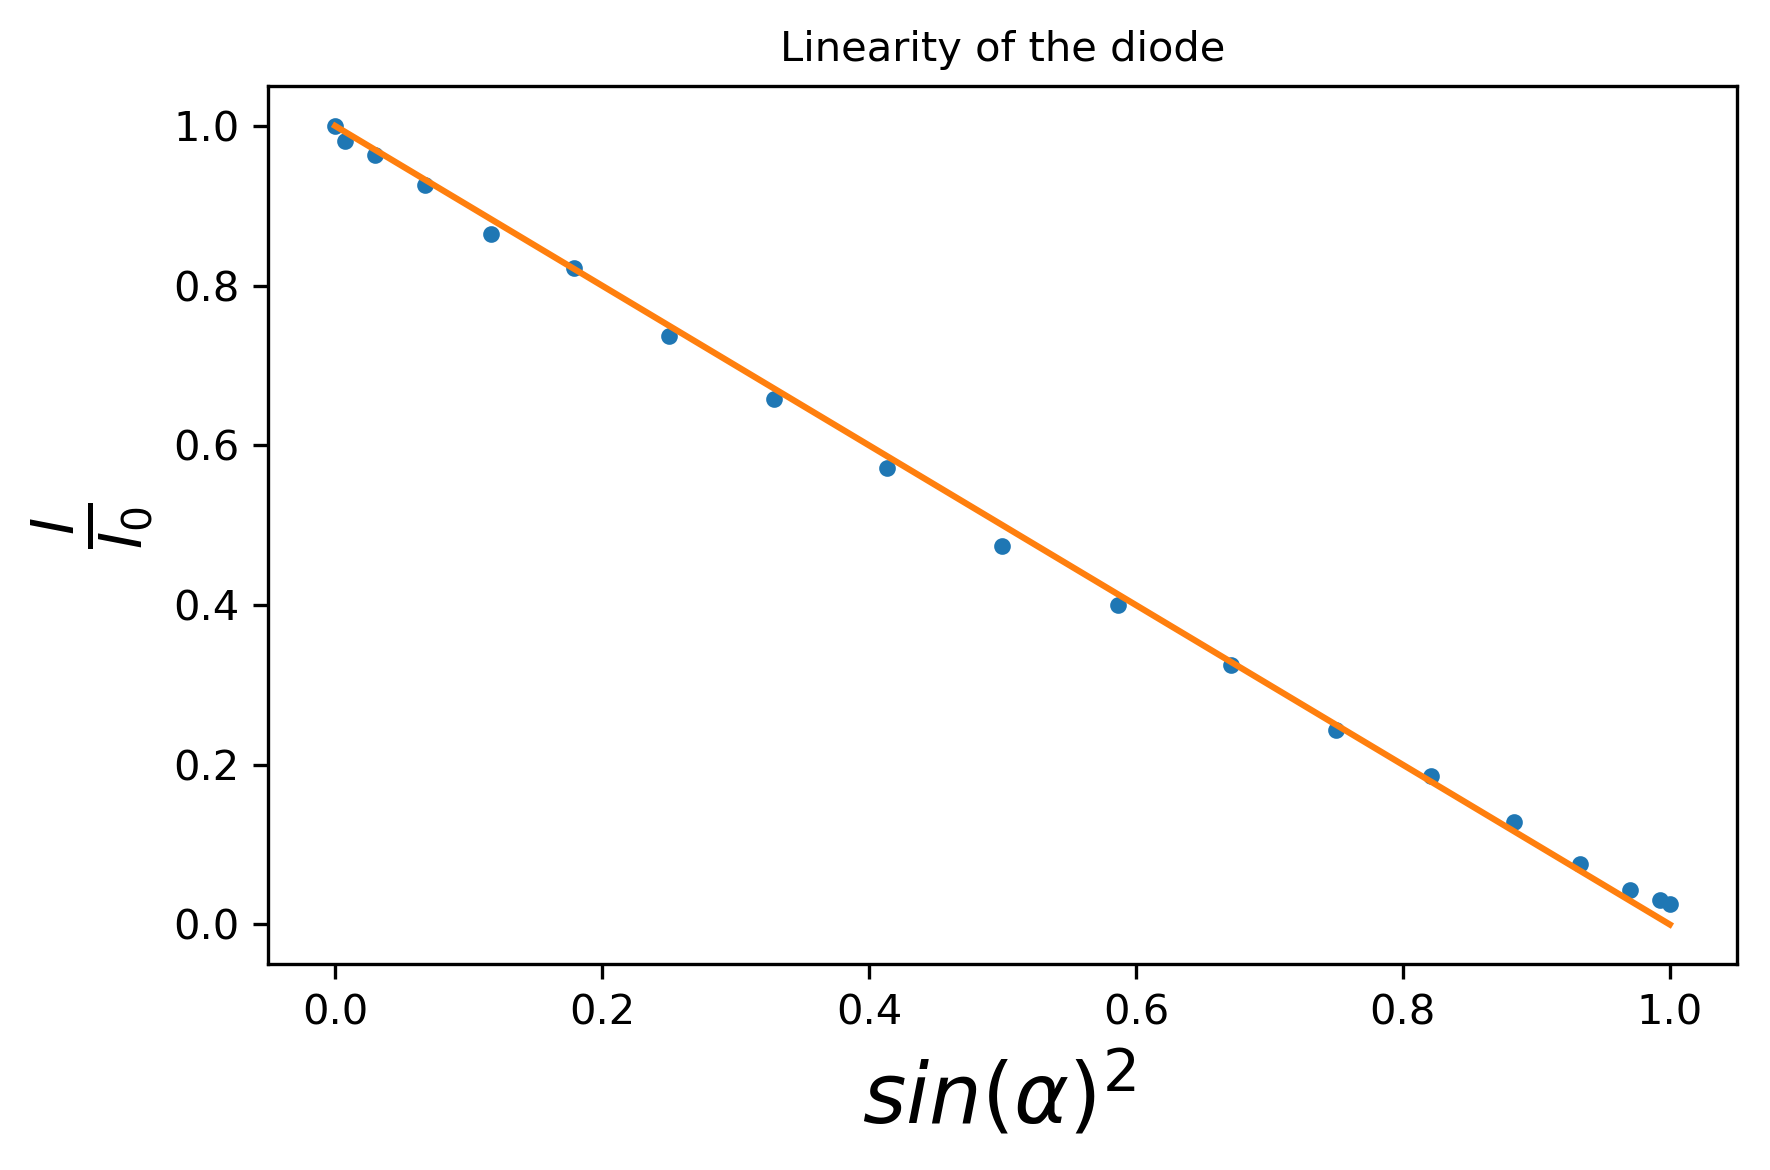

In [2]:
#Als erstes mal die Linearität der Fotodiode Prüfen
data=pd.read_table("Data/Polarisation.txt",skiprows=2)
data
func=lambda x,m,b:x*m+b
angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
intens=intens/np.max(intens)
fig,ax=plt.subplots(dpi=300,)
ax.plot(np.sin(degtorad(angle))**2,intens,".")
mylin=np.linspace(0,1,1000)
chisq=chisquared(func,np.sin(degtorad(angle))**2,intens,(-1,1))
print(chisq)
ax.plot(mylin,1-mylin,label="m:-1 \nb=1")
ax.set_xlabel(r"$sin(\alpha)^2$ ")
ax.set_ylabel(r"$\frac{I}{I_0}$")
ax.set_title("Linearity of the diode")
plt.tight_layout()
fig.savefig("Plots/IntCalibration")

In [3]:
def dirac(wavelen,T,E_F):
    E=c.h * c.c / wavelen /c.e
    return 500/ ( np.exp((E-E_F)/8.6e-5 /T) -1 ) # k_B in eV
def diracE(E,T,E_F):
    return 1/ ( np.exp((E-E_F)/c.k/T) -1 ) 

def heavi(x,A,b,c):
    return A * (np.sign(x-b) + c) # A=amp/2 , b=Eg in nm

def expon(x,A,E_g):
    E=c.h * c.c / x /c.e
    return A * np.exp(E/E_g)
def linearfit(linf,x,y,m,b,ymin,ymax):
    """Returns popt,pcov,relevantx,relevanty"""
    tempx=[]
    tempy=[]
    #hier werden die Daten ausgewählt die im richtigen y interval sind
    for i in range(len(y)):
        if(ymin<y[i] and y[i]<ymax):
            tempx.append(x[i])
            tempy.append(y[i])
    popt,pcov=curce_fit(linf,tempx,tempy,p0=(m,b),maxfev=10000)
    return popt,pcov,tempx,tempy
def adjustLambda(lamb,m=0.98,b=23.25):
    return(b+lamb*m)
def wavelen_in_Energy(wavelen):
    wavelen=np.array(wavelen)
    wavelen=wavelen*1e-9
    E=c.h*c.speed_of_light/(wavelen*c.e)
    return(E)

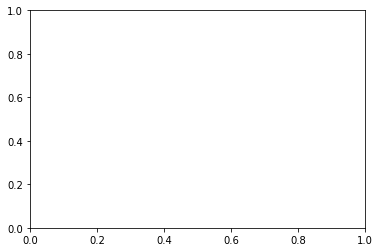

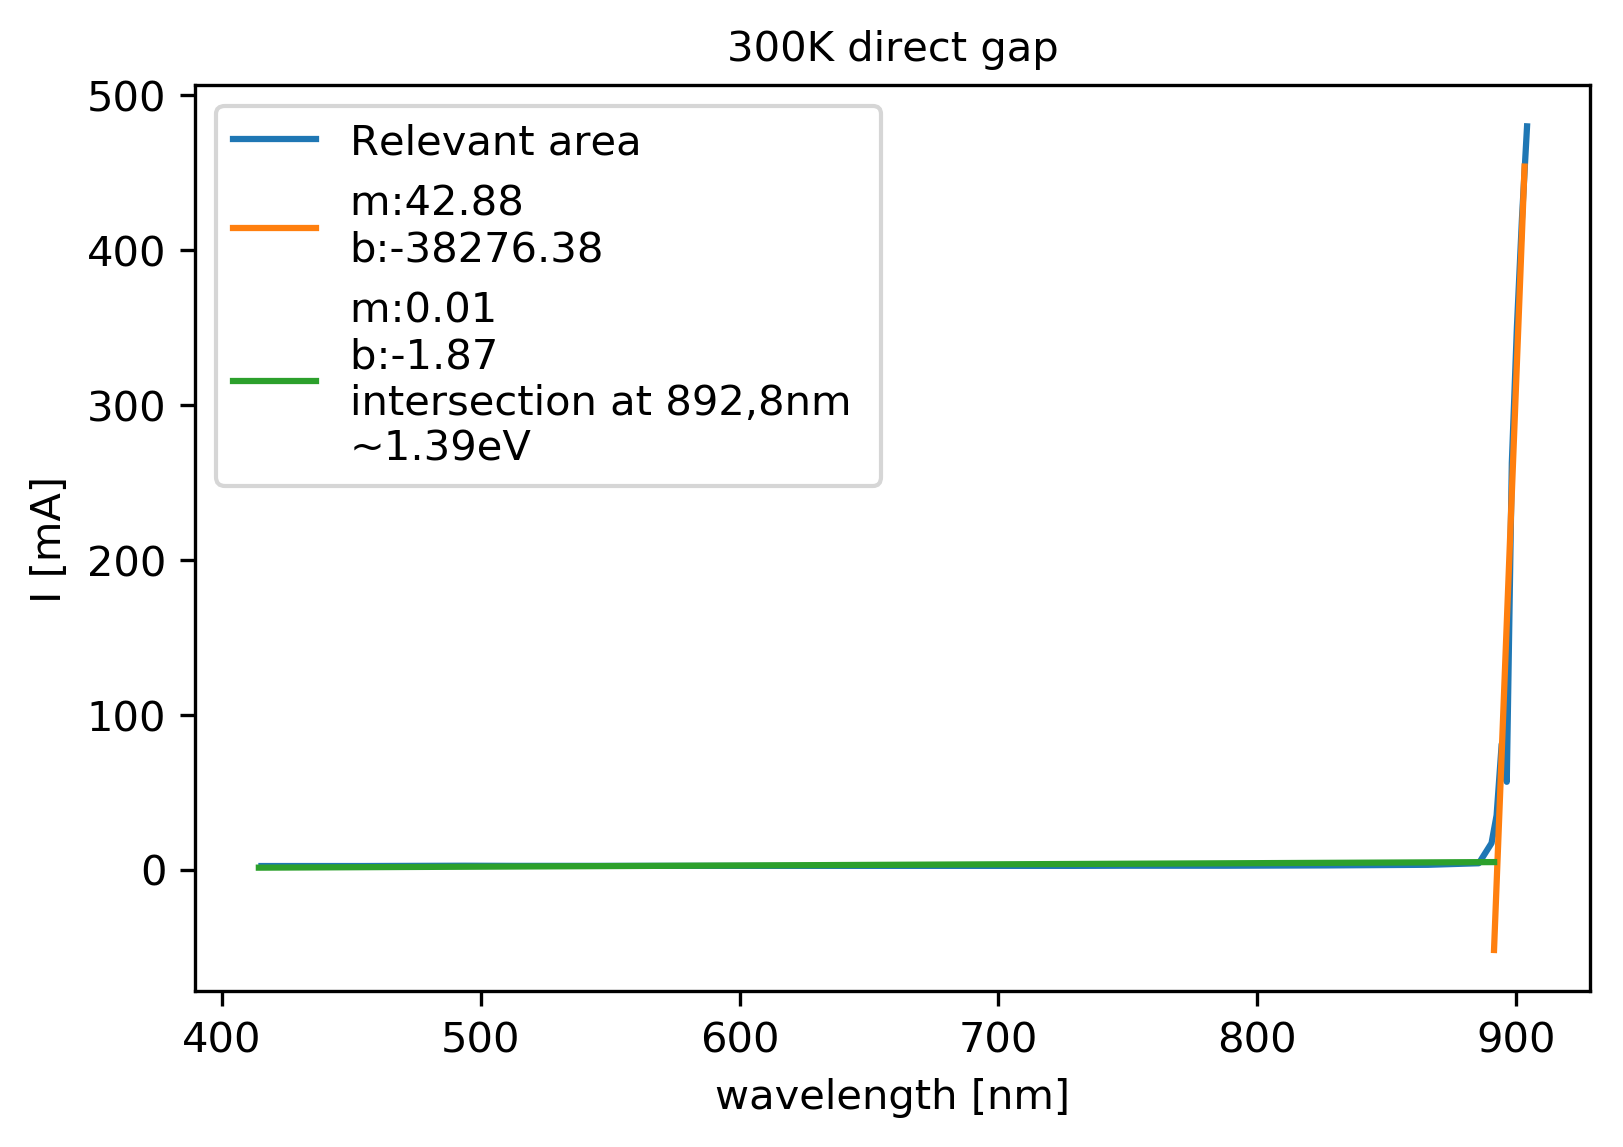

In [4]:
plt.rc('axes', labelsize=MEDIUM_SIZE)   
fig,ax=plt.subplots()
#plotXY(ax,"Data/Links.txt",2,"Gesamte Links N2")
data=pd.read_table("Data/Links.txt",skiprows=2)
angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
#Den hinteren teil abschneiden
fig,ax=plt.subplots(dpi=300)
relangle=[]
for x in angle:
    if(x<900):
        relangle.append(x)
relangle=adjustLambda(np.array(relangle))
relintens=intens[:len(relangle)]
ax.plot(relangle,relintens,label="Relevant area")
#Fit des Anstiegs
func=lambda x,m,b:m*x+b
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,10,800,20,450)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="m:{:.2f} \nb:{:.2f}".format(*popt))
#Fit der geraden bis 800nm
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,0,0,0,20)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="m:{:.2f} \nb:{:.2f} \nintersection at 892,8nm \n~{:.2f}eV".format(*popt,wavelen_in_Energy(892.8)))
ax.legend()
ax.set_title("300K direct gap")
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel("I [mA]")
fig.savefig("Plots/300k direct gap")

In [5]:
def plotXY(ax,filename,skiprows,label,color):
    data=pd.read_table(filename,skiprows=skiprows)
    angle=np.array(data.values[:,0])
    intens=np.array(data.values[:,1])
 
    ax.plot(angle,intens,".",label=label,color=color,alpha=.7)
    ax.plot(angle,intens,alpha=0.5,c=color)

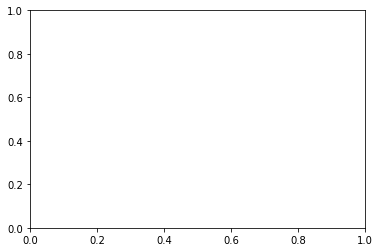

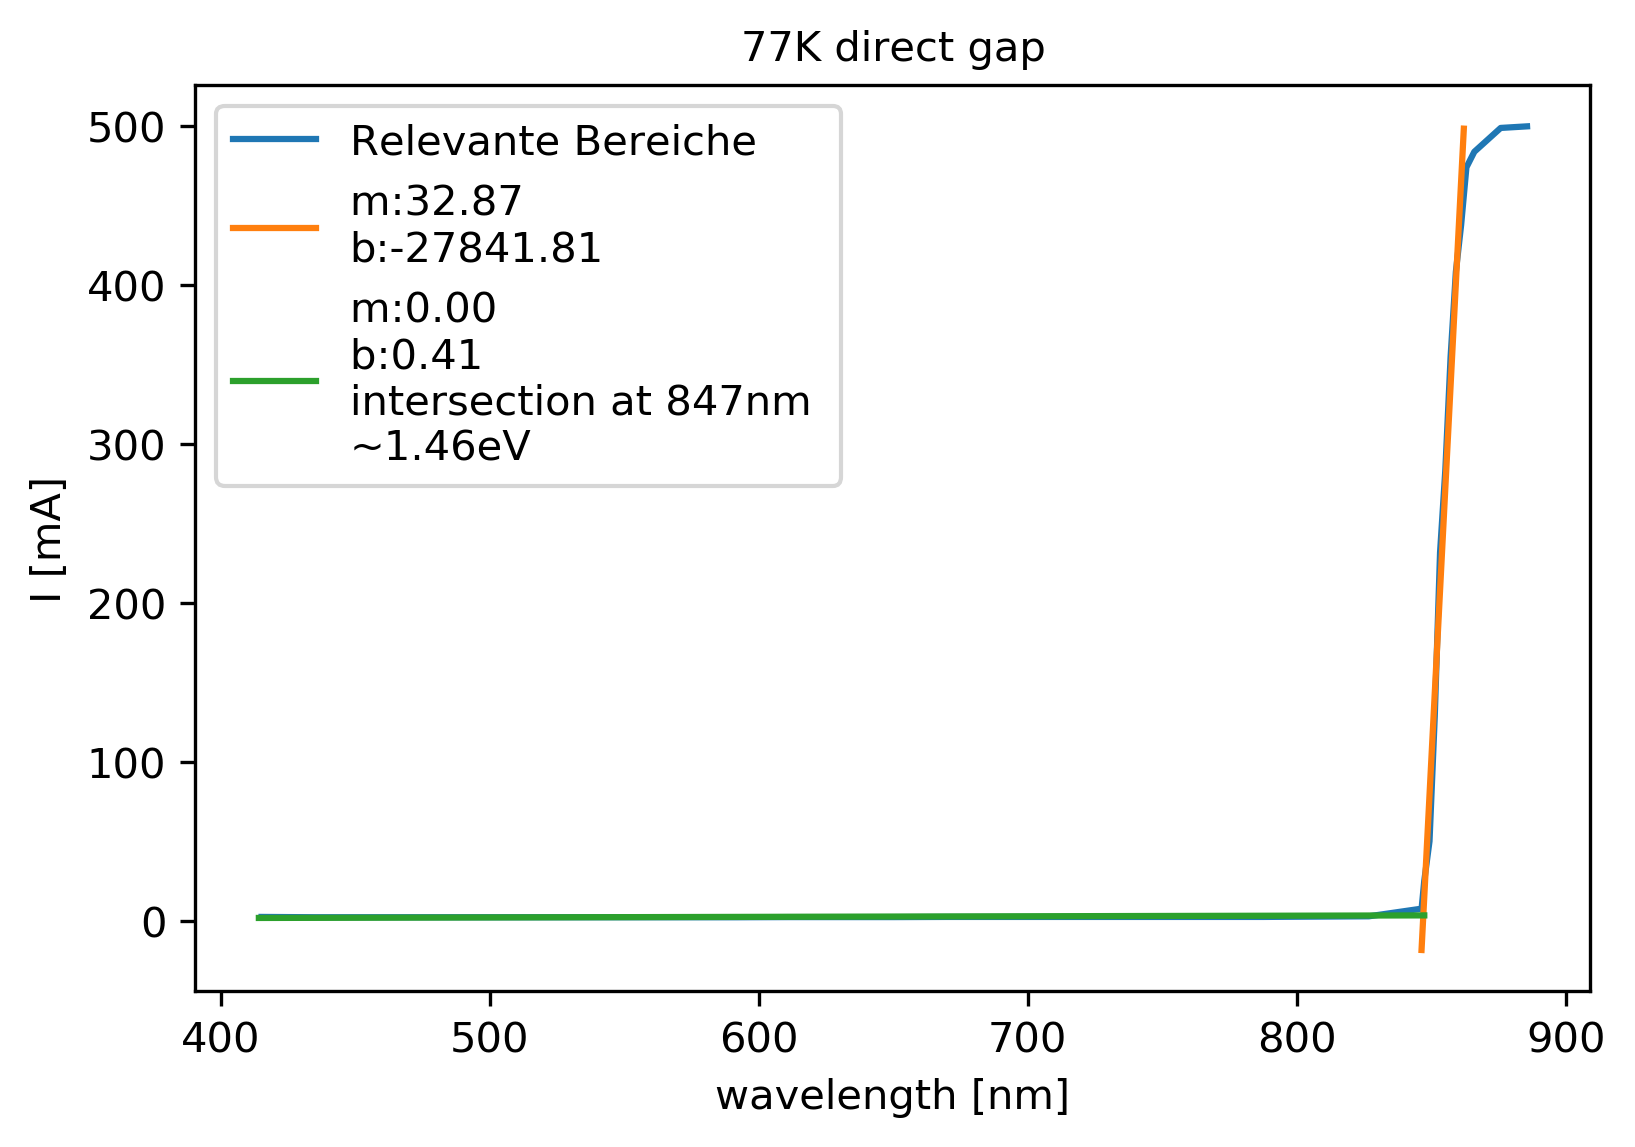

In [6]:
fig,ax=plt.subplots()
#plotXY(ax,"Data/LinksN2.txt",2,"Gesamte Links N2")
data=pd.read_table("Data/LinksN2.txt",skiprows=2)
angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
#Den hinteren teil abschneiden
fig,ax=plt.subplots(dpi=300)
relangle=[]
for x in angle:
    if(x<900):
        relangle.append(x)
relangle=adjustLambda(np.array(relangle))
relintens=intens[:len(relangle)]
ax.plot(relangle,relintens,label="Relevante Bereiche")
#Fit des Anstiegs
func=lambda x,m,b:m*x+b
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,10,800,20,450)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="m:{:.2f} \nb:{:.2f}".format(*popt))
#Fit der geraden bis 800nm
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,0,0,0,20)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="m:{:.2f} \nb:{:.2f} \nintersection at 847nm \n~{:.2f}eV".format(*popt,wavelen_in_Energy(847)))
ax.legend()
ax.set_title("77K direct gap")
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel("I [mA]")
fig.savefig("Plots/77k direct gap")

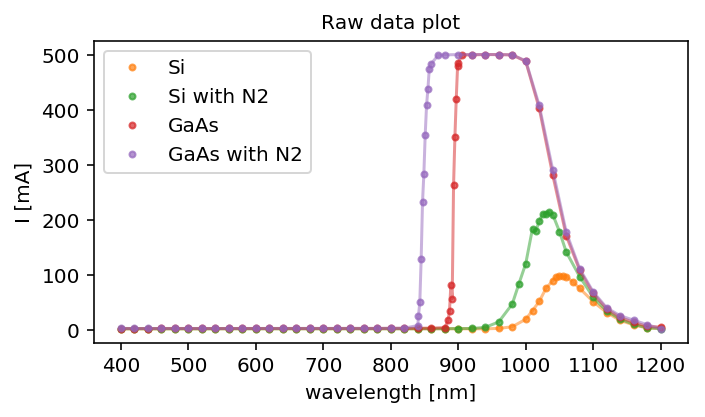

In [7]:
fig,ax=plt.subplots(dpi=144,figsize=(5,3))
plotXY(ax,"Data/Rechts.txt",2,"Si","C1")
plotXY(ax,"Data/RechtsN2.txt",2,"Si with N2","C2")
plotXY(ax,"Data/Links.txt",2,"GaAs","C3")
plotXY(ax,"Data/LinksN2.txt",2,"GaAs with N2","C4")
#ax.semilogy
ax.set_title("Raw data plot")
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel("I [mA]")
plt.tight_layout()
ax.legend()
fig.savefig("Plots/raw data")

In [35]:
def indFit(wl,Eg,Ep,A,T=300):
    wl=wl*1e-9
    h_nu= c.h*c.c /wl /c.e
    return A *((h_nu - Eg + Ep)**2/ ( np.exp(Ep/c.Boltzmann/c.e / T) -1) + (h_nu - Eg - Ep)**2/ ( 1- np.exp(-Ep/c.Boltzmann/c.e / T) ))

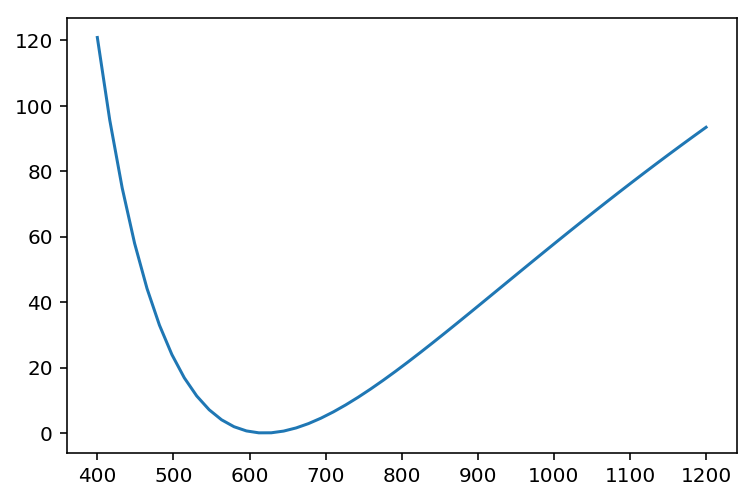

In [36]:
#popt,pcov=cf(ind Fit)

d=np.linspace(400,1200)
fig,ax=plt.subplots(dpi=144)
ax.plot(d,100* indFit(d, 1.7, 0.3,1))
#ax.set(yscale="log")

1 : [  0.3658515   0.8047336 360.7065033]
1e-05 1e-05
2 : [2.20015365e-01 9.50569739e-01 3.60706504e+02]
1e-05 1.000005
3 : [1.28821960e+04 1.28873116e+04 9.90775451e-10]
1e-05 2.0
4 : [  0.80434621   0.3662389  360.7065047 ]
1.000005 1e-05
5 : [1.45745771e+04 1.45857679e+04 7.73669910e-10]
1.000005 1.000005
6 : [1.31468242e+04 1.31523391e+04 9.51260236e-10]
1.000005 2.0
7 : [1.28070438e+04 1.28079621e+04 1.00276882e-09]
2.0 1e-05
8 : [1.35437862e+04 1.35454594e+04 8.96504013e-10]
2.0 1.000005
9 : [1.16530231e+04 1.16555844e+04 1.21082750e-09]
2.0 2.0


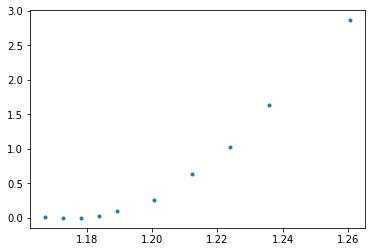

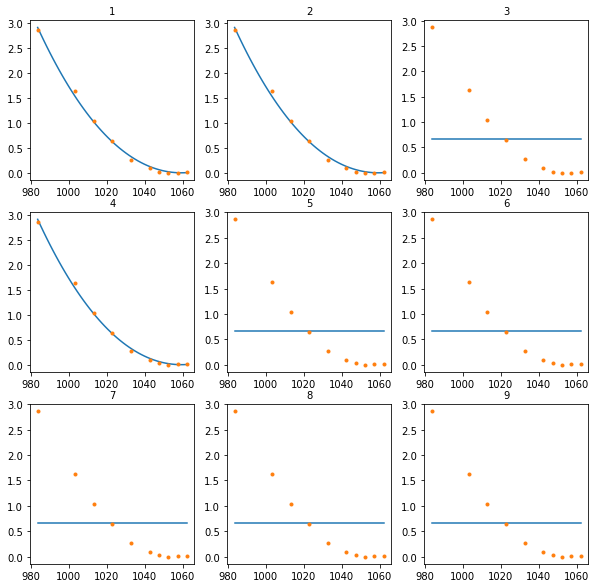

In [39]:
data=pd.read_table("Data/Rechts.txt",skiprows=2)
wavelen=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
wavelen=adjustLambda(wavelen)
temp=np.argmax(intens)+3
xmin=29
intens=intens[xmin:temp]
intens=np.max(intens)/intens

#hier bin ich mir nicht sicher
intens=np.log(intens)

wavelen=wavelen[xmin:temp]
energy=wavelen_in_Energy(wavelen)
fig,ax=plt.subplots()
ax.plot(energy,intens,".")
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(10,10))
#ax[0,0].plot(energy,intens,".")
Eg=np.linspace(1e-5,2,3)
Ef=Eg
counter=0
xcounter=-1
ycounter=0
xaxis=np.linspace(min(wavelen),max(wavelen))
for x in Eg:
    xcounter=xcounter+1
    ycounter=0
    for y in Ef:
        try:
            counter=counter+1
            popt,pcov=curce_fit(indFit,wavelen,intens,p0=(x,y,250),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]) )
            #if(popt[0]>popt[1]):
            print(counter,":",popt)
            print(x,y)
            ax[xcounter,ycounter].plot(xaxis,indFit(xaxis,*popt))
            ax[xcounter,ycounter].plot(wavelen,intens,".")
            ax[xcounter,ycounter].set_title(counter)
            ycounter=ycounter+1
        except RuntimeError:
            print("nothing")

9 : [  0.80434621   0.3662389  360.7065047 ] mit p0: 2.0 , 2.0
[8.89460418e-04 8.89460414e-04 1.78285107e+01]


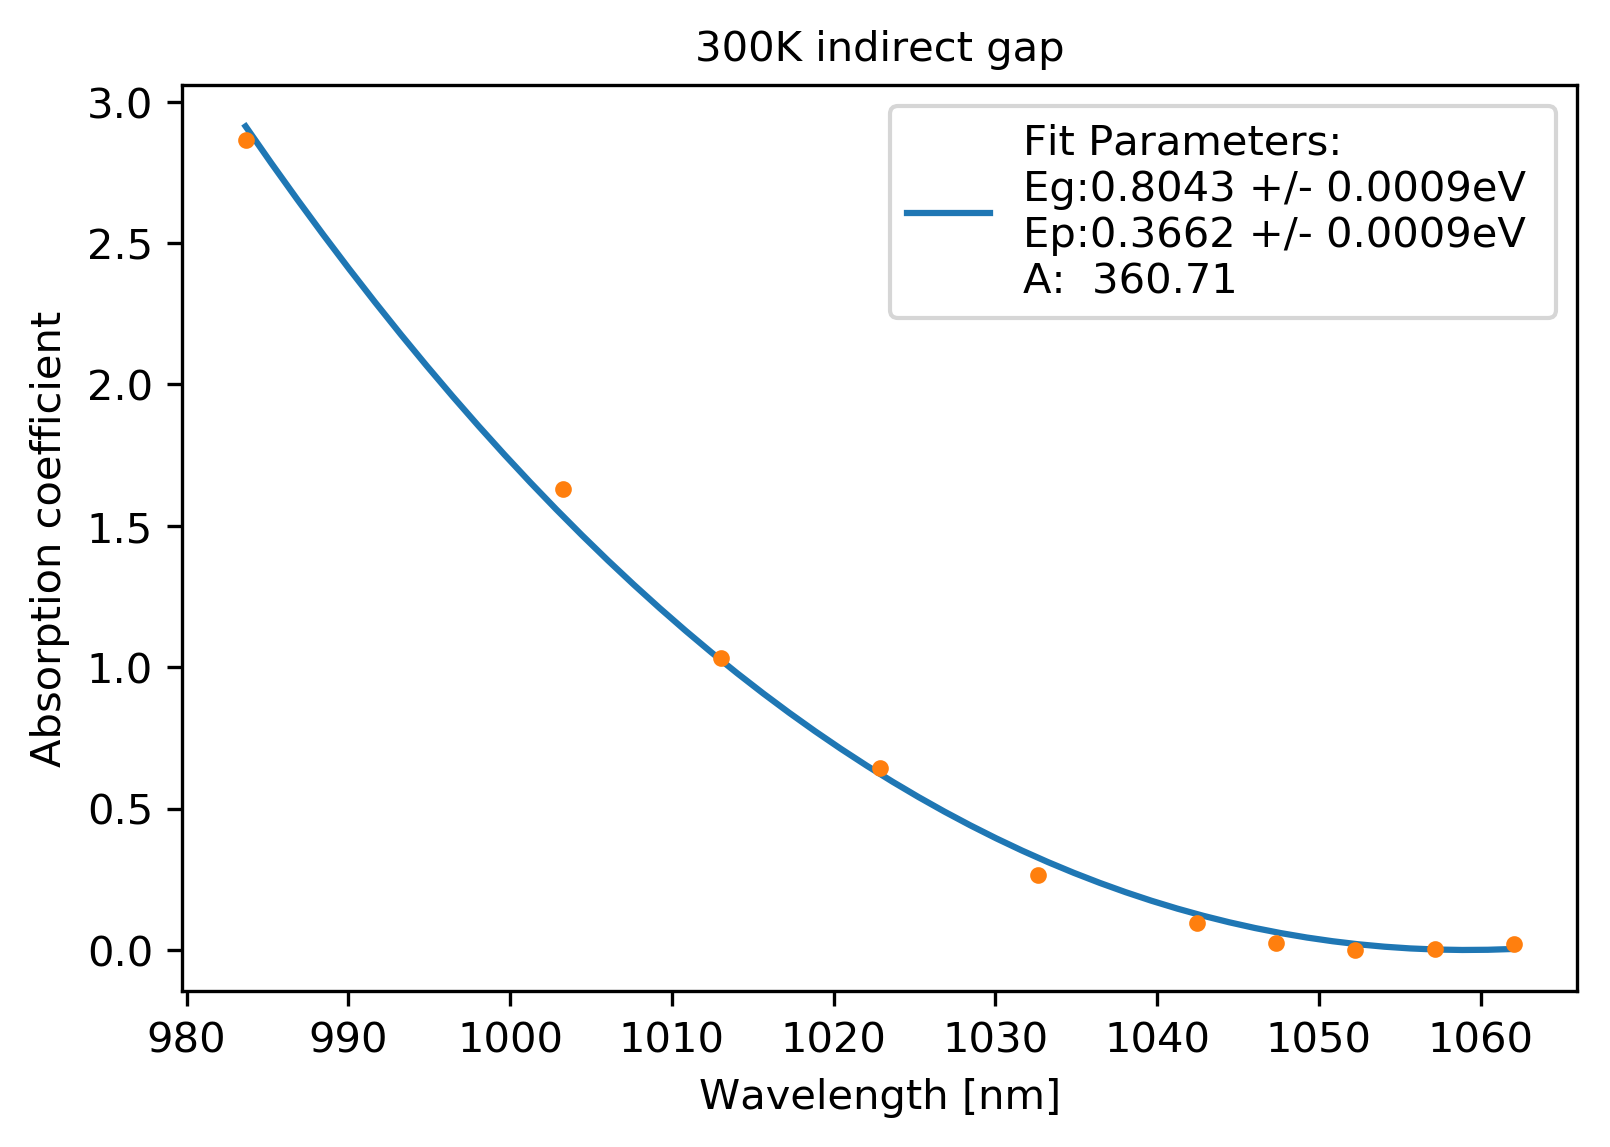

In [40]:
fig,ax=plt.subplots(dpi=300)     
popt,pcov=curce_fit(indFit,wavelen,intens,p0=(1.000005 ,1e-05,250),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]) )
#if(popt[0]>popt[1]):
print(counter,":",popt, "mit p0:",x,",",y)
chisq=chisquared(indFit,wavelen,intens,popt)
perr = np.sqrt(np.diag(pcov))
print(perr)
ax.plot(xaxis,indFit(xaxis,*popt),label="Fit Parameters: \nEg:{:.4f} +/- {:.4f}eV \nEp:{:.4f} +/- {:.4f}eV \nA:  {:.2f}".format(float(popt[0]),float(perr[0]),float(popt[1]),float(perr[1]),float(popt[2])))#+"\n"+r"$\chi^2$:{:.2f}".format(chisq))
ax.plot(wavelen,intens,".")
ax.set_title("300K indirect gap")
ax.legend()
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Absorption coefficient")
fig.savefig("Plots/300k indirect gap")


In [12]:
def indFit(wl,Eg,Ep,A,T=77):
    wl=wl*1e-9
    h_nu= c.h*c.c /wl /c.e
    return A *((h_nu - Eg + Ep)**2/ ( np.exp(Ep/c.Boltzmann/c.e / T) -1) + (h_nu - Eg - Ep)**2/ ( 1- np.exp(-Ep/c.Boltzmann/c.e / T) ))

1 : [  0.8707302    0.31696662 257.40787099] mit p0: 1e-05 , 1e-05
[1.88842063e-03 1.88842063e-03 1.97321899e+01]
2 : [  0.88921438   0.29848235 257.40741924] mit p0: 1e-05 , 1.000005
[1.88842105e-03 1.88842102e-03 1.97321490e+01]
3 : [1.62203483e+04 1.62228122e+04 7.98691966e-10] mit p0: 1e-05 , 2.0
[1.87637143e-23 1.87003034e-23 3.81079998e-10]
4 : [  0.29848586   0.88921086 257.40741899] mit p0: 1.000005 , 1e-05
[1.88842102e-03 1.88842105e-03 1.97321490e+01]
5 : [1.72644402e+04 1.72728043e+04 7.04778338e-10] mit p0: 1.000005 , 1.000005
[1.37244645e-23 1.37386197e-23 3.36267622e-10]
6 : [1.52984615e+04 1.52996336e+04 8.98036101e-10] mit p0: 1.000005 , 2.0
[2.51491091e-23 2.51142298e-23 4.28425893e-10]
7 : [1.41989703e+04 1.41974086e+04 1.04270486e-09] mit p0: 2.0 , 1e-05
[3.65332757e-23 3.65602832e-23 4.97440719e-10]
8 : [1.36740558e+04 1.36712428e+04 1.12439744e-09] mit p0: 2.0 , 1.000005
[4.41153927e-23 4.41893418e-23 5.36418068e-10]
9 : [1.70425293e+04 1.70466503e+04 7.23448139e-1

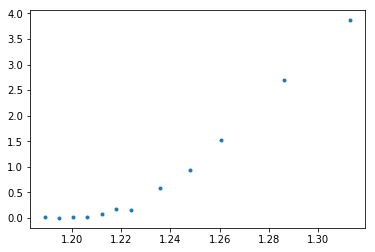

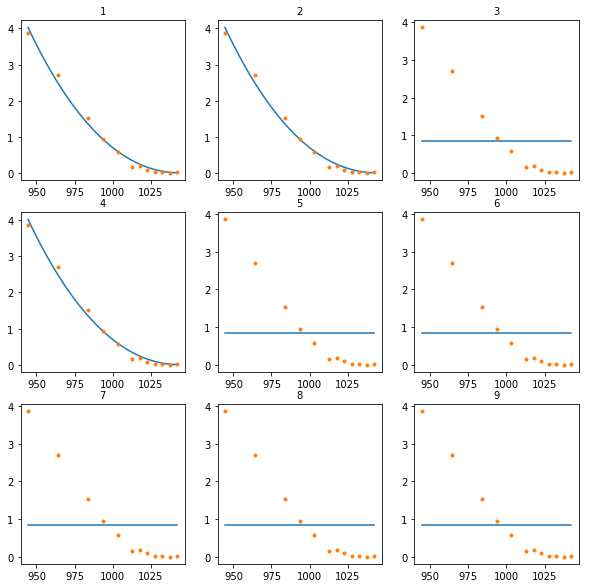

In [33]:
data=pd.read_table("Data/RechtsN2.txt",skiprows=2)
wavelen=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
wavelen=adjustLambda(wavelen)
temp=np.argmax(intens)+2
xmin=27
intens=intens[xmin:temp]
intens=np.max(intens)/intens

#hier bin ich mir nicht sicher
intens=np.log(intens)

wavelen=wavelen[xmin:temp]
energy=wavelen_in_Energy(wavelen)
fig,ax=plt.subplots()
ax.plot(energy,intens,".")
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(10,10))
#ax[0,0].plot(energy,intens,".")
Eg=np.linspace(1e-5,2,3)
Ef=Eg
counter=0
xcounter=-1
ycounter=0
xaxis=np.linspace(min(wavelen),max(wavelen))
for x in Eg:
    xcounter=xcounter+1
    ycounter=0
    for y in Ef:
        try:
            counter=counter+1
            popt,pcov=curce_fit(indFit,wavelen,intens,p0=(x,y,250),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]) )
            #if(popt[0]>popt[1]):
            print(counter,":",popt, "mit p0:",x,",",y)
            perr = np.sqrt(np.diag(pcov))
            print(perr)
            ax[xcounter,ycounter].plot(xaxis,indFit(xaxis,*popt))
            ax[xcounter,ycounter].plot(wavelen,intens,".")
            ax[xcounter,ycounter].set_title(counter)
            ycounter=ycounter+1
        except RuntimeError:
            print("nothing")



[1.88842105e-03 1.88842102e-03 1.97321490e+01]


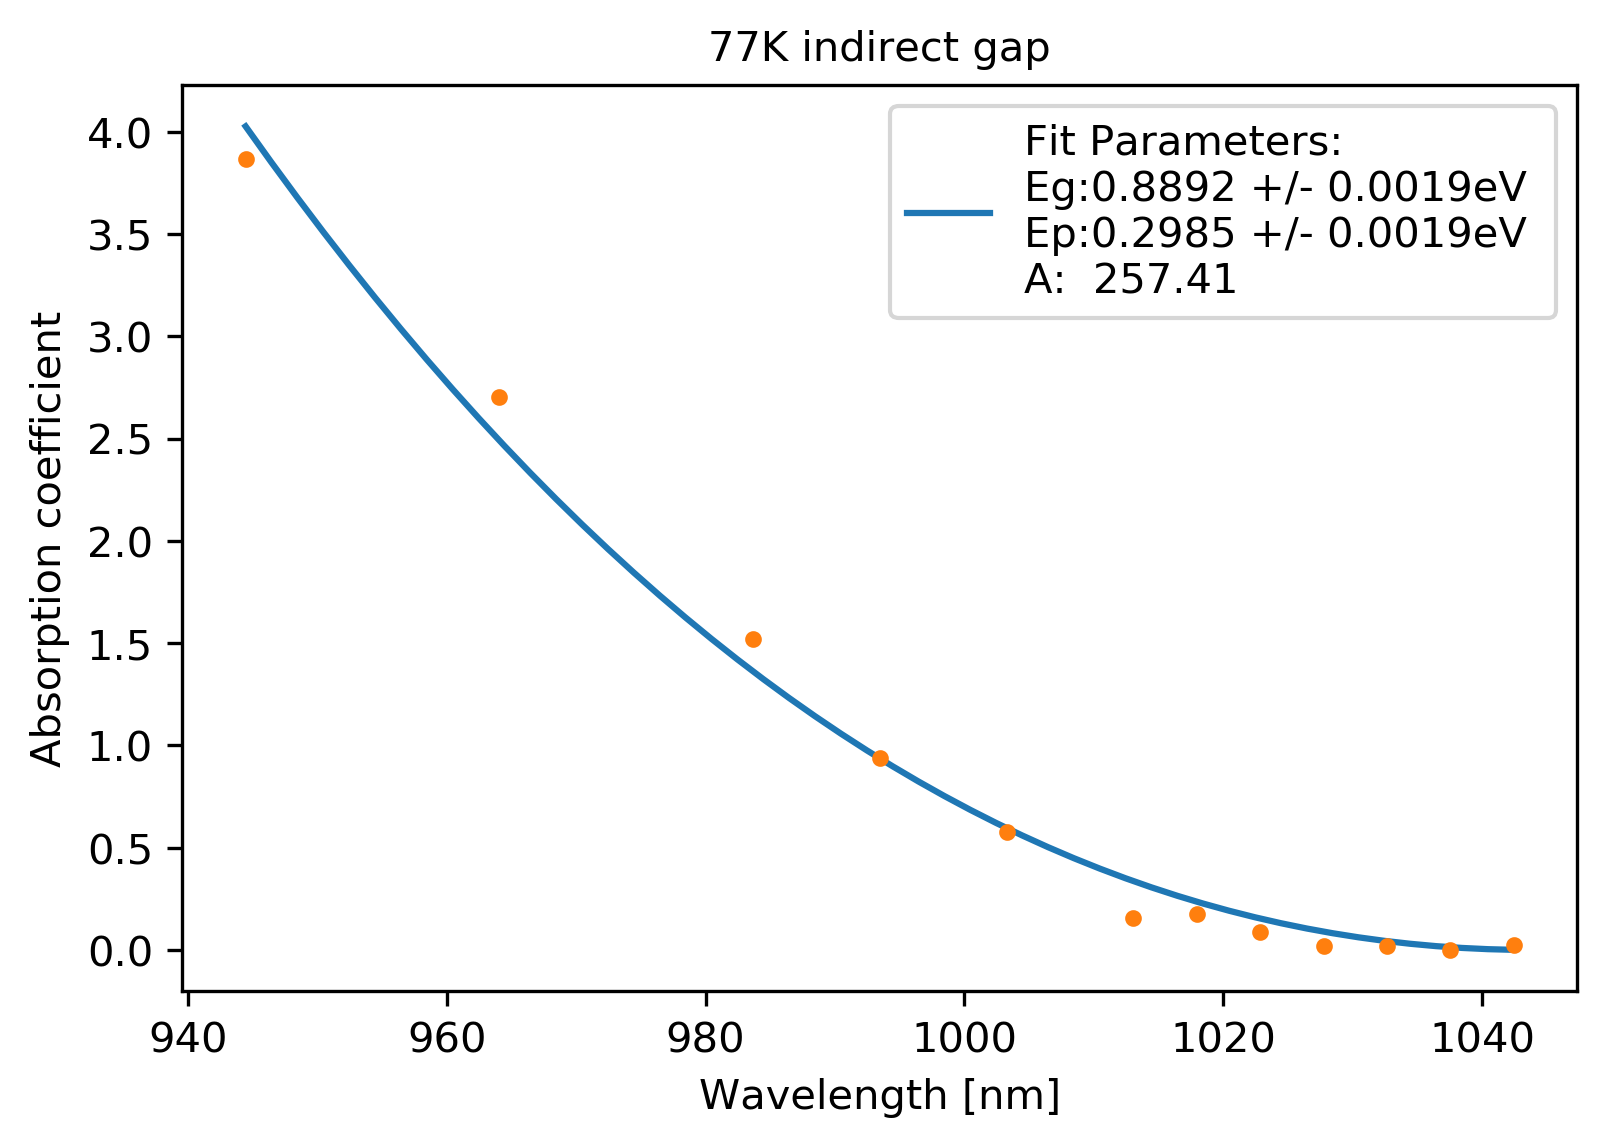

In [34]:
fig,ax=plt.subplots(dpi=300)     
popt,pcov=curce_fit(indFit,wavelen,intens,p0=(1e-05 , 1.000005,250),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]) )
#if(popt[0]>popt[1]):
#print(counter,":",popt, "mit p0:",x,",",y)
perr = np.sqrt(np.diag(pcov))
print(perr)
chisq=(chisquared(indFit,wavelen,intens,popt))
ax.plot(xaxis,indFit(xaxis,*popt),label="Fit Parameters: \nEg:{:.4f} +/- {:.4f}eV \nEp:{:.4f} +/- {:.4f}eV \nA:  {:.2f}".format(float(popt[0]),float(perr[0]),float(popt[1]),float(perr[1]),float(popt[2])))
ax.plot(wavelen,intens,".")
ax.set_title("77K indirect gap")
ax.legend()
plt.tight_layout
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Absorption coefficient")
fig.savefig("Plots/77K indirect gap")


1 : [3.39028731e-08 1.19642613e+00 3.44547049e+02] mit p0: 1e-05 , 1e-05
[2.35282447e+04 2.35282455e+04 1.85156658e+01]
2 : [1.19642559e+00 3.14834583e-08 3.44541423e+02] mit p0: 1e-05 , 1.000005
[2.35538038e+04 2.35538030e+04 1.85061108e+01]
3 : [1.11510186e+04 1.11486514e+04 1.07389451e-09] mit p0: 1e-05 , 2.0
[5.11094704e-23 5.11345418e-23 5.30620975e-10]
4 : [3.14833208e-08 1.19642559e+00 3.44541424e+02] mit p0: 1.000005 , 1e-05
[2.35327155e+04 2.35327163e+04 1.85154867e+01]
5 : [9.29646266e+03 9.29367538e+03 1.54491500e-09] mit p0: 1.000005 , 1.000005
[1.26913024e-22 1.26983631e-22 7.63529281e-10]
6 : [1.36892740e+04 1.36913690e+04 7.12240732e-10] mit p0: 1.000005 , 2.0
[1.83112323e-23 1.82869436e-23 3.51953300e-10]
7 : [1.36407517e+04 1.36372300e+04 7.17593349e-10] mit p0: 2.0 , 1e-05
[1.86579368e-23 1.86610716e-23 3.54607574e-10]
8 : [1.39066031e+04 1.38988684e+04 6.90631449e-10] mit p0: 2.0 , 1.000005
[1.69541631e-23 1.69745958e-23 3.41280284e-10]
9 : [1.09351799e+04 1.09398906

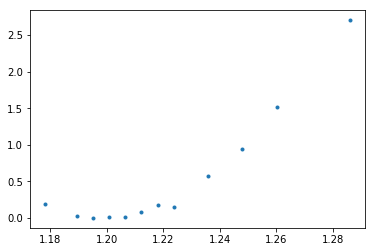

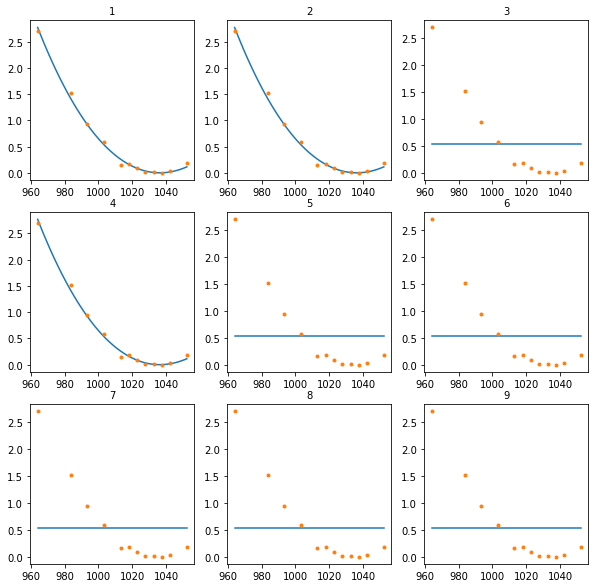

In [41]:
data=pd.read_table("Data/RechtsN2.txt",skiprows=2)
wavelen=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
wavelen=adjustLambda(wavelen)
temp=np.argmax(intens)+3
xmin=28
intens=intens[xmin:temp]
intens=np.max(intens)/intens

#hier bin ich mir nicht sicher
intens=np.log(intens)

wavelen=wavelen[xmin:temp]
energy=wavelen_in_Energy(wavelen)
fig,ax=plt.subplots()
ax.plot(energy,intens,".")
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(10,10))
#ax[0,0].plot(energy,intens,".")
Eg=np.linspace(1e-5,2,3)
Ef=Eg
counter=0
xcounter=-1
ycounter=0
xaxis=np.linspace(min(wavelen),max(wavelen))
for x in Eg:
    xcounter=xcounter+1
    ycounter=0
    for y in Ef:
        try:
            counter=counter+1
            popt,pcov=curce_fit(indFit,wavelen,intens,p0=(x,y,250),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]) )
            #if(popt[0]>popt[1]):
            print(counter,":",popt, "mit p0:",x,",",y)
            perr = np.sqrt(np.diag(pcov))
            print(perr)
            ax[xcounter,ycounter].plot(xaxis,indFit(xaxis,*popt))
            ax[xcounter,ycounter].plot(wavelen,intens,".")
            ax[xcounter,ycounter].set_title(counter)
            ycounter=ycounter+1
        except RuntimeError:
            print("nothing")



[2.35538038e+04 2.35538030e+04 1.85061108e+01]


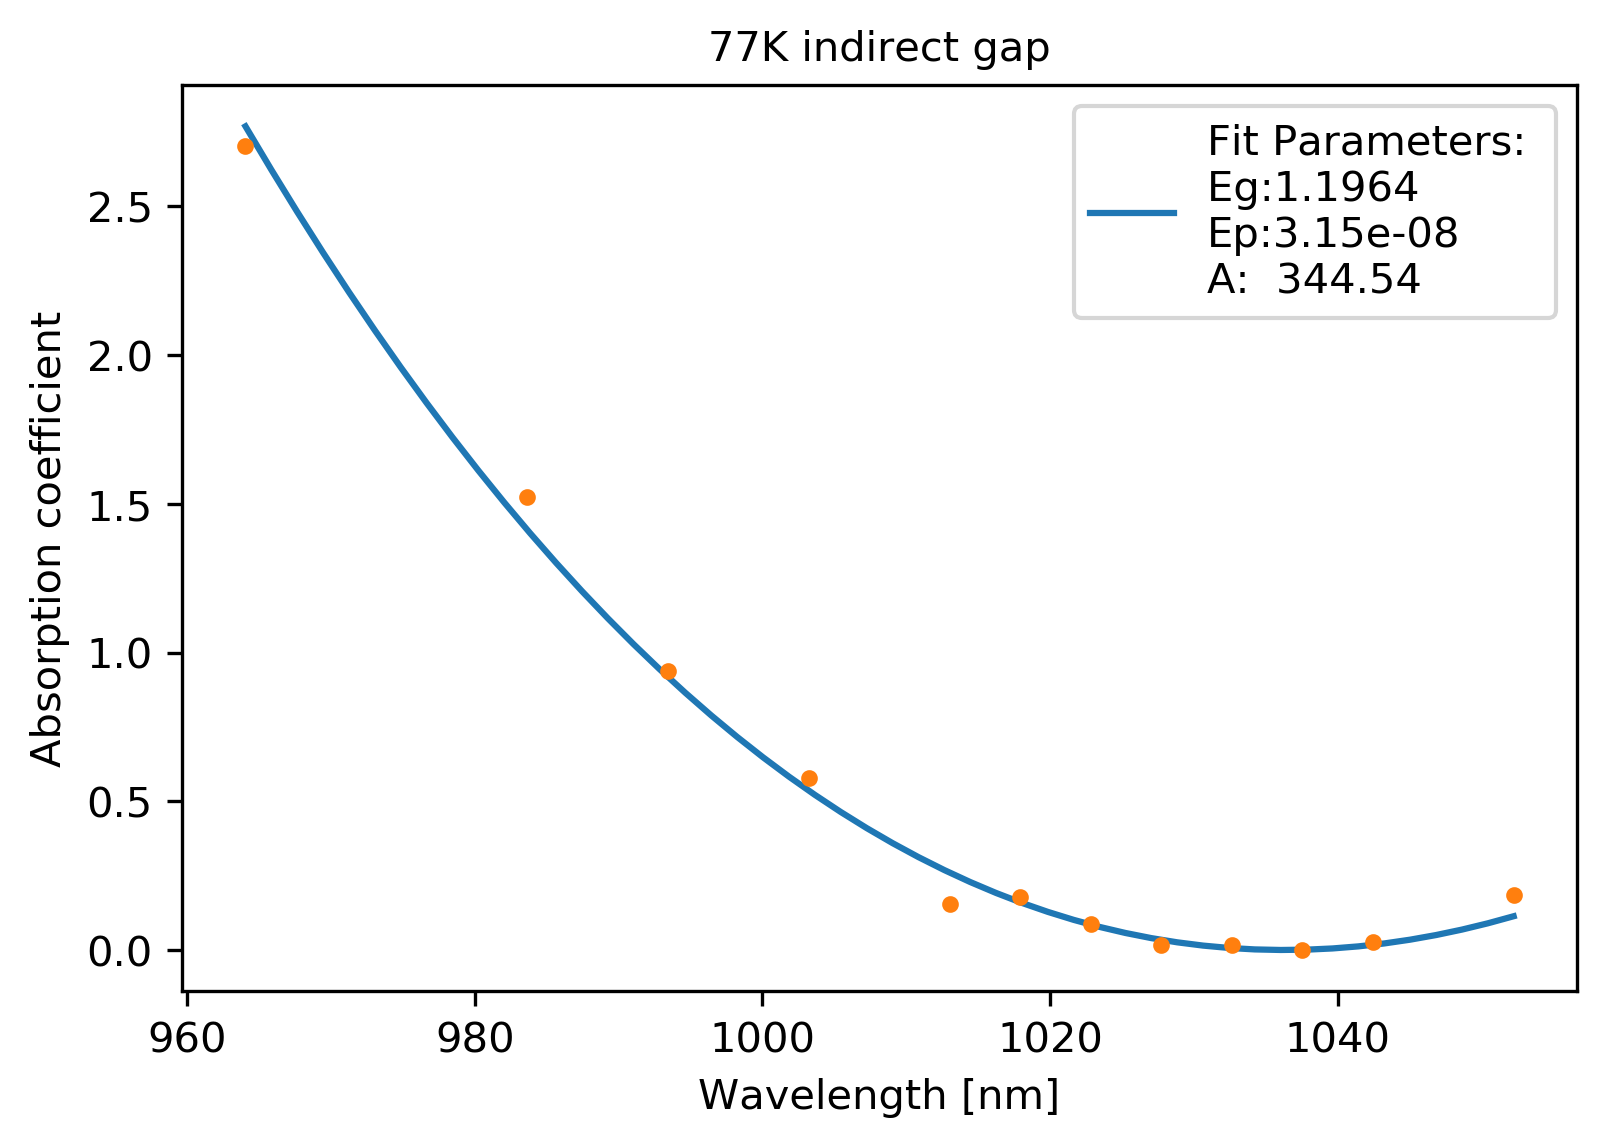

In [44]:
fig,ax=plt.subplots(dpi=300)     
popt,pcov=curce_fit(indFit,wavelen,intens,p0=(1e-05 , 1.000005,250),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]) )
#if(popt[0]>popt[1]):
#print(counter,":",popt, "mit p0:",x,",",y)
perr = np.sqrt(np.diag(pcov))
print(perr)
chisq=(chisquared(indFit,wavelen,intens,popt))
ax.plot(xaxis,indFit(xaxis,*popt),label="Fit Parameters: \nEg:{:.4f} \nEp:{:.2e}\nA:  {:.2f}".format(float(popt[0]),float(popt[1]),float(popt[2])))
ax.plot(wavelen,intens,".")
ax.set_title("77K indirect gap")
ax.legend()
plt.tight_layout
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Absorption coefficient")
fig.savefig("Plots/77K indirect gap alternative")


In [15]:
mcolors.ColorConverter()

In [46]:
wavelen_in_Energy(980)

1.2651448713919098